### Importing Libraries & Data

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
# Load tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load Data
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
len(gutenberg.fileids())

18

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### Tokenize the text

In [7]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [8]:
word_tokenize(gberg_sent_tokens[0])

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

In [9]:
gberg_sents = gutenberg.sents()
gberg_sents[0:3]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I']]

In [10]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [11]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [12]:
len(gutenberg.words())

2621613

### Word2vec model

In [13]:
model = Word2Vec(sentences=gberg_sents, vector_size=64, sg=1, window=10, min_count=5,seed=42, workers=8)

In [14]:
model.save('raw_gutenberg_model.w2v')

### Exploring the Model

In [15]:
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [19]:
model.wv['man']

array([ 0.01533723, -0.8793915 ,  0.24460869, -0.11555195,  0.03400166,
        0.03046958, -0.46241283, -0.2380098 , -0.38003808,  0.28106794,
       -0.2585823 , -0.19921842,  0.43993396,  0.2632479 , -0.05324434,
        0.19775087, -0.1642339 ,  0.3979505 , -0.52561456, -0.12013385,
       -0.06861619, -0.33616155, -0.39280024,  0.10960241, -0.45117474,
       -0.06160305, -0.39198676,  0.01655227, -0.09449016,  0.06637628,
        0.25136292, -0.3740536 , -0.10814683,  0.24632029,  0.12125202,
        0.2809318 ,  0.3735823 ,  0.10507271,  0.29001436, -0.09319177,
       -0.12053637, -0.41125628,  0.06169706, -0.00693419, -0.31719536,
        0.40724823, -0.2117313 , -0.31571797, -0.64807445, -0.20478213,
        0.07205547, -0.4419234 , -0.09004723,  0.08305823, -0.26132807,
        0.10077582,  0.04950061,  0.00532371,  0.22423817, -0.55658734,
        0.3464106 , -0.51885337, -0.07525981,  0.5121602 ], dtype=float32)

In [21]:
len(model.wv['man'])

64

In [22]:
model.wv.most_similar('man')

[('fairy', 0.7192452549934387),
 ('he', 0.7125639319419861),
 ('one', 0.7056562304496765),
 ('policeman', 0.7021927237510681),
 ('philosopher', 0.6922557950019836),
 ('figure', 0.6847789883613586),
 ('farmer', 0.6792151927947998),
 ('gentleman', 0.677677571773529),
 ('clown', 0.6687190532684326),
 ('lazy', 0.667796790599823)]

In [23]:
model.wv.doesnt_match("mother father daughter dog".split())

'dog'

In [24]:
model.wv.similarity('father', 'dog')

0.44657385

In [25]:
model.wv.most_similar(positive=['father', 'woman'], negative='man')

[('husband', 0.3662715256214142),
 ('sister', 0.3452901840209961),
 ('wife', 0.32212913036346436),
 ('Rachel', 0.32102087140083313),
 ('brother', 0.30527088046073914),
 ('Rebekah', 0.3049037456512451),
 ('loved', 0.2948583662509918),
 ('whoredoms', 0.29025906324386597),
 ('daughter', 0.2860049903392792),
 ('mother', 0.28011706471443176)]

### Reducing Word Vector Dimentionality Uding t-SNE

In [28]:
len(model.wv)

17011

In [29]:
X = model.wv[model.wv.key_to_index]

In [30]:
tsne = TSNE(n_components=2, n_iter=1000)

In [31]:
X_2d = tsne.fit_transform(X)

In [36]:
X_2d[0:5]

array([[-26.896425, -26.478283],
       [-27.389114, -26.410763],
       [-27.39509 , -26.472206],
       [-27.296995, -27.216034],
       [-27.56789 , -26.293535]], dtype=float32)

In [32]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.key_to_index

In [33]:
coords_df.head(10)

,x,y,token
0,-26.896425,-26.478283,","
1,-27.389114,-26.410763,the
2,-27.395090,-26.472206,and
3,-27.296995,-27.216034,.
4,-27.567890,-26.293535,of
5,44.685272,18.212662,:
6,-27.191721,-26.910202,to
7,-25.993547,-27.645823,a
8,-27.755930,-26.169758,in
9,33.662735,-19.746176,I


In [34]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

### 2D Visualization

In [37]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

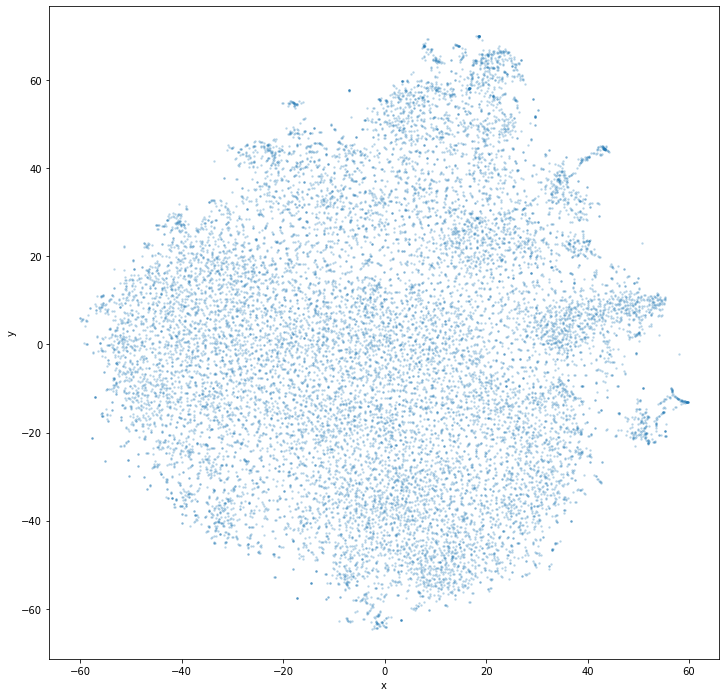

In [38]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.2)

In [39]:
output_notebook()

Loading BokehJS ...

In [40]:
subset_df = coords_df.sample(n=1000)

In [41]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [42]:
show(p)